
## Homework 1
---
### Part 1:
* Training a neural net model on mnist handwritten data. 
* Model should have 5 hidden layers. 
* Collecting the outputs of the output(softmax) layer and plot the images associated to those outputs.
* Repeating the above step for the last hidden layer.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline 

%tensorflow_version 2.x

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() # load data
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
# scaling. the data-set

x_train, x_test = x_train/255, x_test/255

In [5]:
mxtrain = tf.constant(x_train, name='x_train')
mxtrain.shape

TensorShape([60000, 28, 28])

In [6]:
# plt.imshow(mxtrain[1], interpolation='nearest')
# plt.show()

In [7]:
CLASSES = 10

In [8]:
# 5 layer model

# 0
model5 = tf.keras.models.Sequential([
    # tf.keras.layers.Flatten(input_shape=(28, 28)),  
    # tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Flatten(input_shape=(28, 28)),

    tf.keras.layers.Dense(1024, activation='relu', name='layer1'),
    tf.keras.layers.Dense(1024, activation='relu', name='layer2'),
    tf.keras.layers.Dense(1024, activation='relu', name='layer3'),
    tf.keras.layers.Dense(1024, activation='relu', name='layer4'),
    tf.keras.layers.Dense(1024, activation='relu', name='layer5'),
    tf.keras.layers.Dense(CLASSES, activation='softmax', name='layer_softmax')
])

In [9]:
model5.compile(
  optimizer='sgd',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  # loss='mse',
  metrics=['accuracy'])

In [10]:
model5.fit(x=x_train, y=y_train, epochs=25)

Epoch 1/25


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


1875/1875 [==============================] - 13s 5ms/step - loss: 0.5785 - accuracy: 0.8476
Epoch 2/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1995 - accuracy: 0.9418
Epoch 3/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1416 - accuracy: 0.9586
Epoch 4/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1087 - accuracy: 0.9672
Epoch 5/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0855 - accuracy: 0.9743
Epoch 6/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0694 - accuracy: 0.9793
Epoch 7/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0563 - accuracy: 0.9834
Epoch 8/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0456 - accuracy: 0.9867
Epoch 9/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0375 - accuracy: 0.9893
Epoch 10/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0299 -

In [11]:
# model =  tf.keras.models.Sequential([
#   tf.keras.layers.Flatten(input_shape=(28, 28)),
#   tf.keras.layers.Dense(1024, activation='relu'),
#   tf.keras.layers.Dense(1024, activation='relu'),
#   tf.keras.layers.Dense(1024, activation='relu'),
#   tf.keras.layers.Dense(1024, activation='relu'),
#   tf.keras.layers.Dense(1024, activation='relu'),
#   # tf.keras.layers.Dropout(0.2),
#   tf.keras.layers.Dense(10)
# ])

# model.compile(optimizer='sgd',
#   loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
#   # loss = "mse",
#   metrics=['accuracy'])
# model.fit(x_train, y_train, epochs=5)

In [12]:
model5.evaluate(x_test,  y_test, verbose=2)

/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


313/313 - 1s - loss: 0.0738 - accuracy: 0.9810


[0.07380583137273788, 0.9810000061988831]

In [13]:
# probability_model = tf.keras.Sequential([
#   model5,
#   tf.keras.layers.Softmax()
# ])

In [14]:
# sum(model5.predict(x_test[:1]).tolist()[0])

In [15]:
# model5.summary()


---
### Plotting the images associated with the the softmax layer output:

In [18]:
x_test1000, y_test1000  = x_test[:1000], y_test[:1000]
probas1000 = model5.predict(x_test1000)
proba_dict = {k:[] for k in range(10)}
for i in range(1000):
  proba_dict[np.argmax(probas1000[i])].append(x_test1000[i])
# proba_dict

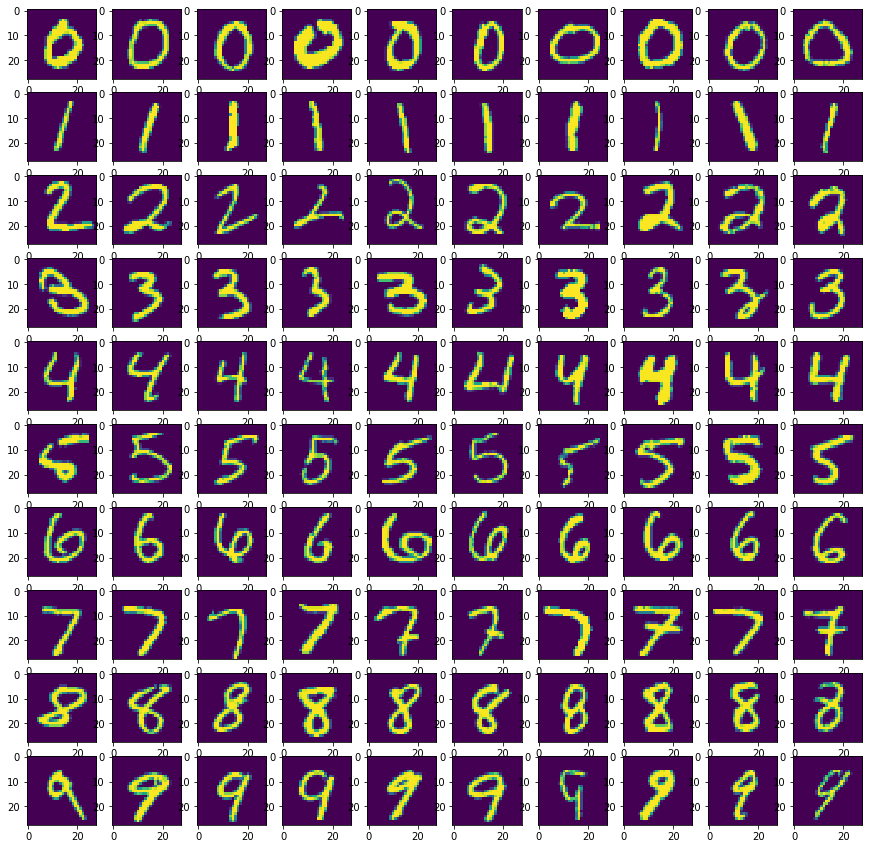

In [53]:
# 10 x 10 grid plots
fig, axs = plt.subplots(10, 10, figsize = (15,15))
# print(ax)
for i in range(10):
  for j in range(10):
    axs[i][j].imshow(proba_dict[i][j], interpolation='nearest')
plt.show()

---
### Extracting the second-last layer features and plotting the images associated:

In [20]:
layer5_model = tf.keras.Model(inputs=model5.input,
                                       outputs=model5.get_layer('layer5').output)
layer5_data = layer5_model(x_test)
layer5_data.shape

TensorShape([10000, 1024])

In [21]:
# layer5_data[0][100::100]

In [22]:
layer5_dict = {k:[] for k in range(10)}
for i in range(1000):
  layer5_dict[np.argmax(layer5_data[i][100::100])].append(x_test1000[i])

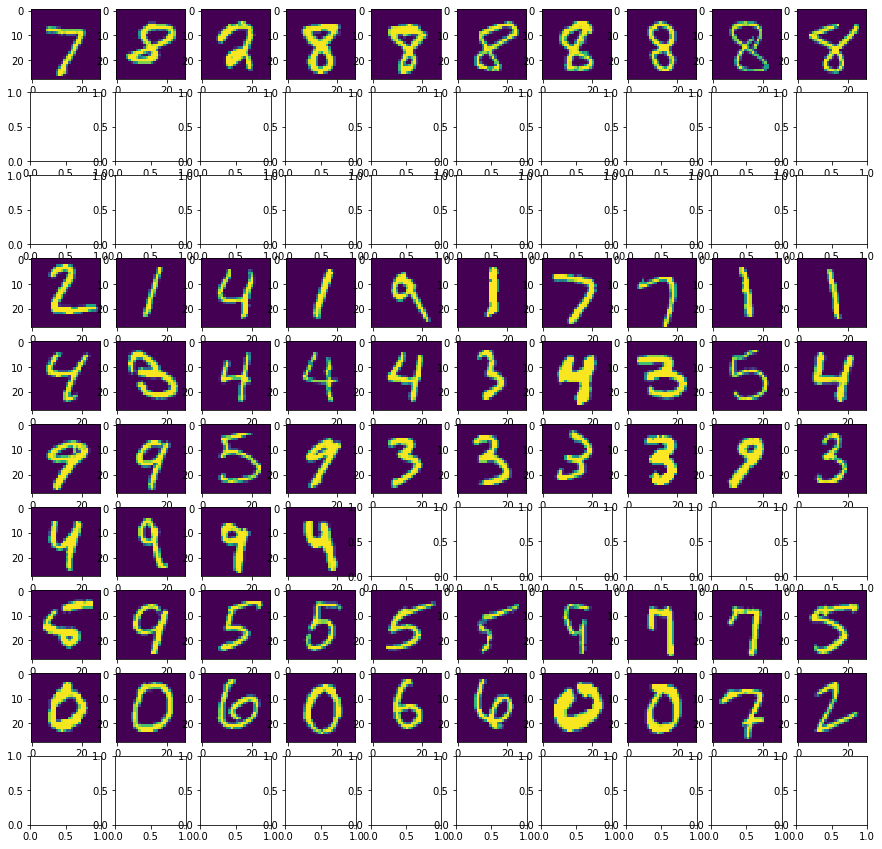

In [81]:
# 10 x 10 grid plots
fig, axs = plt.subplots(10, 10, figsize = (15,15))
# print(ax)
for i in range(10):
  for j in range(10):
    if j< len(layer5_dict[i]):
      axs[i][j].imshow(layer5_dict[i][j], interpolation='nearest')
    else:
      pass
  # ax[i].set_ylabel('Row: '+str((i+1)*100))
plt.show()

#### Observations:

* Here we are considering 10 random dimensions out of 1024 to be the outputs and then plotting the imaged associated with the maximum of these 10 outputs.
* In this plot, we can see that in particular rows, there are repetitions of characters/digits. And it is important to note that even if a row does not have all same digits, that row contains digits with similar features.
* To elaborate the above point, consider the 9th row in the above plot. Here there are a lot of 6's and 0's. Both these characters have similar curvatures.
* However this pattern is not so clear in the above plot. I previous ran the same code and obtained the following plot: [linked-plot](https://ibb.co/55z5g5M). In this plot we can notice that similar drawn digits(shapes) are found in the same row. For instance, 6 & 0 in row #1; 9, 0 & 8 in row #10.
* As these dimensions are randomly selected, and their images are plotted, we cannot actually conclude what kind of features are captured by what dimension.
* But we can say that these dimensions capture some features for some specific characters/digits, which allows the values of these dimensions to be higher when that character is provided as the input.
* In other words, some dimensions are activated strongly when they encounter some kind of a feature that they extract from the input image.

#### The ideal situation for this observation:
* The ideal situation for visualizing the second-to-last layer would be one-to-one mapping so that we would understand why we observe the kind of pattern mentioned above.

#### Improvements to this approach:

* It is quite hard to tell what kind of features are captured by the different dimensions and how they impact the overall classification of the input characters.
* It would be interesting if there was a way to visualise the features that a particular part of the layer or the neural net captures.


## 1.5 PCA & tSNE

In [25]:
# pd.DataFrame(y_train[:1000]).value_counts()

In [26]:
samples = x_train[0:1000]
# samples = samples/255
samples.shape # samples to apply PCA/tSNE upon

(1000, 28, 28)

In [27]:
# reshape samples to 1000x784
samples = samples.reshape((1000,28*28 ))
samples = pd.DataFrame(samples)
print('Shape: ',samples.shape)
# df1000.head()

Shape:  (1000, 784)


In [28]:
# pca1k = PCA(n_components=2, svd_solver="full")
# sample_pca = pd.DataFrame(pca1k.fit_transform(samples), columns=['PC1', 'PC2'])
# print('Shape:', sample_pca.shape)
# sample_pca.head()

In [29]:
# sample_pca['labels']=y_train[:1000]
# sample_pca['labels'] = sample_pca['labels'].astype('str')
# sample_pca.sort_values('labels', inplace=True)

In [30]:
# sample_pca.groupby('labels')[['PC1', 'PC2']].mean()

In [31]:
# functions to compute PCA/tSNE and plot the scatter-plot of reduced dimensions
def compute_pca(df, labels, n_dims=2, svd_solver="full"):
  pca = PCA(n_components=n_dims, svd_solver="full")
  pca_fitted_df = pd.DataFrame(pca.fit_transform(df), columns=['PC1', 'PC2'])
  print('Shape:', pca_fitted_df.shape)
  pca_fitted_df['labels'] = labels
  pca_fitted_df['labels'] = pca_fitted_df['labels'].astype('str')
  pca_fitted_df.sort_values('labels', inplace=True)
  
  return pca, pca_fitted_df

def plot_pca(pca_fitted_df, props=dict(boxstyle='round', facecolor='wheat', alpha=0.5)):
  group_pca = pca_fitted_df.groupby('labels')[['PC1', 'PC2']].mean()
  # props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

  fig, ax = plt.subplots(1,1,figsize=[10,8])
  sns.scatterplot(data=pca_fitted_df, x='PC1', y='PC2', hue='labels', cmap="viridis")
  # plotting
  for i in group_pca.index:
    ax.text(x=int(group_pca.loc[i,'PC1']), y=int(group_pca.loc[i,'PC2']), s=str(i),fontsize=14, bbox=props)

  plt.title('Scatter-plot after applying PCA')
  plt.show()
  return fig, ax


def compute_tsne(df, labels, n_dims=2):
  tsne = TSNE(n_components=2)
  tsne_fitted_df = pd.DataFrame(tsne.fit_transform(df), columns=['T1', 'T2'])
  print('Shape:', tsne_fitted_df.shape)
  tsne_fitted_df['labels'] = labels
  tsne_fitted_df['labels'] = tsne_fitted_df['labels'].astype('str')
  tsne_fitted_df.sort_values('labels', inplace=True)
  # print(tsne_fitted_df)
  return tsne, tsne_fitted_df

def plot_tsne(tsne_fitted_df, props=dict(boxstyle='round', facecolor='wheat', alpha=0.5)):
  group_tsne = tsne_fitted_df.groupby('labels')[['T1', 'T2']].mean()
  fig, ax = plt.subplots(1,1,figsize=[10,8])

  sns.scatterplot(data=tsne_fitted_df, x='T1', y='T2', hue='labels', cmap="viridis")
  for i in group_tsne.index:
    ax.text(x=int(group_tsne.loc[i,'T1']), y=int(group_tsne.loc[i,'T2']), s=str(i),fontsize=14, bbox=props)
  # int(group_tsne.loc['0','T2'])
  plt.title('Scatter-plot after applying tSNE')
  plt.show()
  return fig, ax

In [32]:
# Scatter plot of PCA
# sns.color_palette("viridis", as_cmap=True)
# # sns.color_palette()
# group_pca = sample_pca.groupby('labels')[['PC1', 'PC2']].mean()
# props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# fig, ax = plt.subplots(1,1,figsize=[10,8])
# sns.scatterplot(data=sample_pca, x='PC1', y='PC2', hue='labels', cmap="viridis")

# for i in group_pca.index:
#   ax.text(x=int(group_pca.loc[i,'PC1']), y=int(group_pca.loc[i,'PC2']), s=str(i),fontsize=14, bbox=props)

# plt.title('Scatter-plot after applying PCA')
# plt.show()

In [33]:
# sample_tsne = pd.DataFrame(TSNE(n_components=2).fit_transform(samples), columns=['T1', 'T2'])

In [34]:
# sample_tsne['labels'] = y_train[:1000]
# sample_tsne['labels'] = sample_tsne['labels'].astype('str')
# sample_tsne.sort_values('labels', inplace=True)

In [35]:
# group_tsne = sample_tsne.groupby('labels')[['T1', 'T2']].mean()

# fig, ax = plt.subplots(1,1,figsize=[10,8])

# sns.scatterplot(data=sample_tsne, x='T1', y='T2', hue='labels', cmap="viridis")
# for i in group_tsne.index:
#   ax.text(x=int(group_tsne.loc[i,'T1']), y=int(group_tsne.loc[i,'T2']), s=str(i),fontsize=14, bbox=props)
# # int(group_tsne.loc['0','T2'])
# plt.title('Scatter-plot after applying tSNE')
# plt.show()

Shape: (1000, 2)


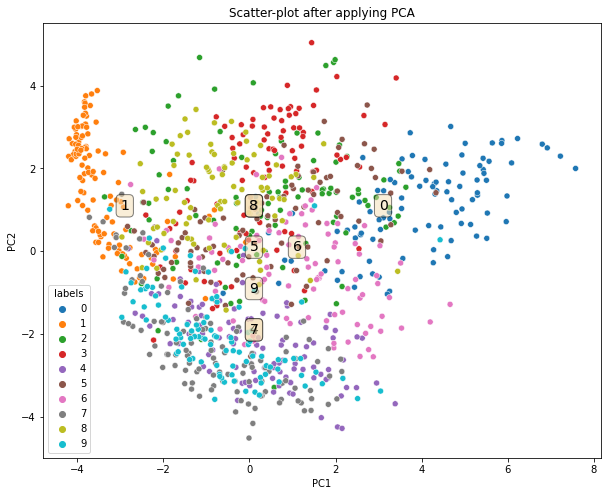

(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f135014c290>)

In [36]:
plot_pca(compute_pca(df=samples, labels=y_train[:1000])[1])

Shape: (1000, 2)


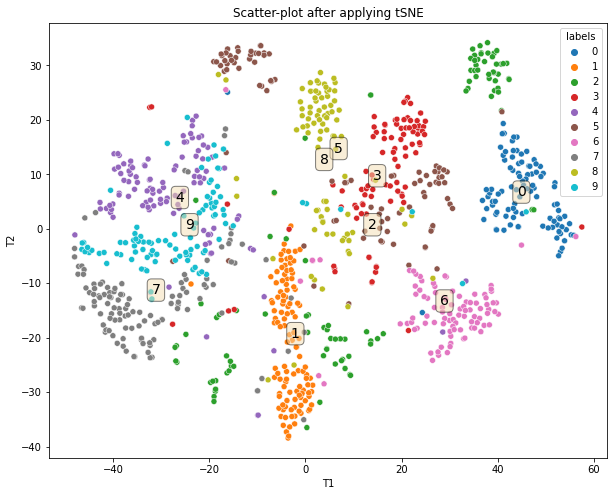

(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f12df3f6050>)

In [37]:
plot_tsne(tsne_fitted_df=compute_tsne(df=samples, labels=y_train[:1000])[1])

#### Observations:
* We can see fairly segregated clusters after appplying tSNE but we cannot see the clusters after applying PCA.
* For tSNE:
  * For values = 4, 7, 9; the clusters are indistinguishable.
  * For value = 2; the data points are scattered all over.
  * For the rest of the values, there are distinct clusters to be seen.



---
#### **Capturing outputs of layers 1 - 5 & output layer and applying PCA & tSNE**
* PCA/tSNE on Layer 1:

In [65]:
# 1st layer output

layer1_model = tf.keras.Model(inputs=model5.input,
                                       outputs=model5.get_layer('layer1').output)
layer1_data = layer1_model(x_test[:1000])
layer1_data.shape

TensorShape([1000, 1024])

Shape: (1000, 2)


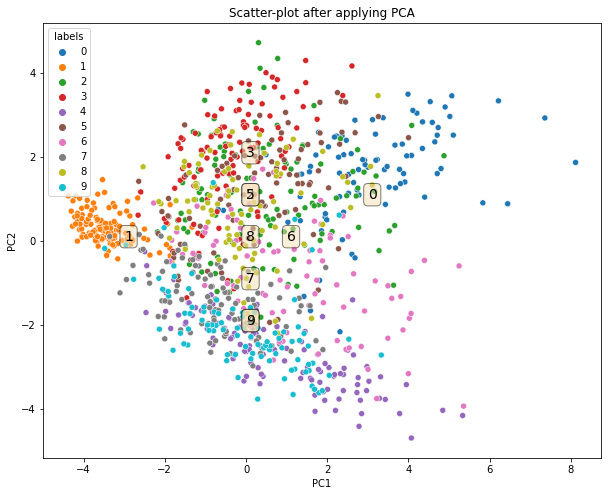

In [64]:
# pca
plot_pca(compute_pca(df=layer1_data, labels=y_test[:1000])[1])
plt.show()

Shape: (1000, 2)


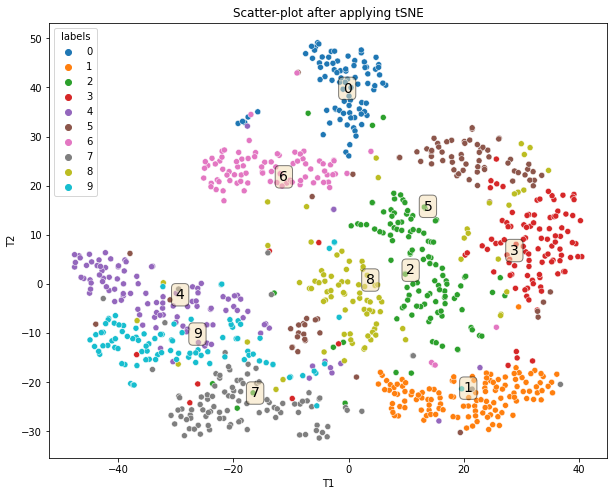

In [63]:
# tsne
plot_tsne(compute_tsne(df=layer1_data, labels=y_test[:1000])[1])
plt.show()

---
* PCA/tSNE on Layer 2:

In [66]:
# 2nd layer output

layer2_model = tf.keras.Model(inputs=model5.input,
                                       outputs=model5.get_layer('layer2').output)
layer2_data = layer2_model(x_test[:1000])
layer2_data.shape

TensorShape([1000, 1024])

Shape: (1000, 2)


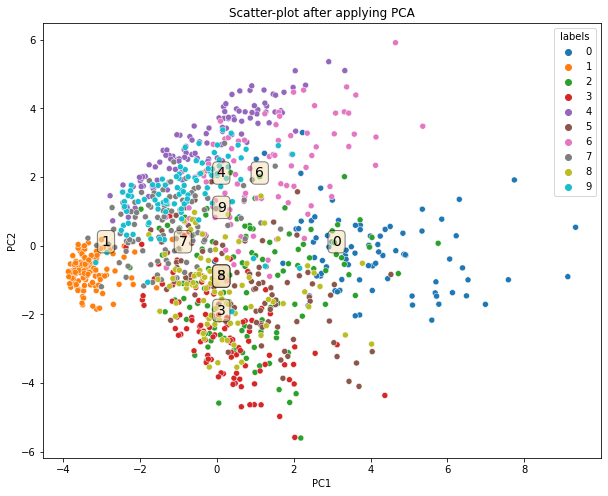

In [67]:
# pca
plot_pca(compute_pca(df=layer2_data, labels=y_test[:1000])[1])
plt.show()

Shape: (1000, 2)


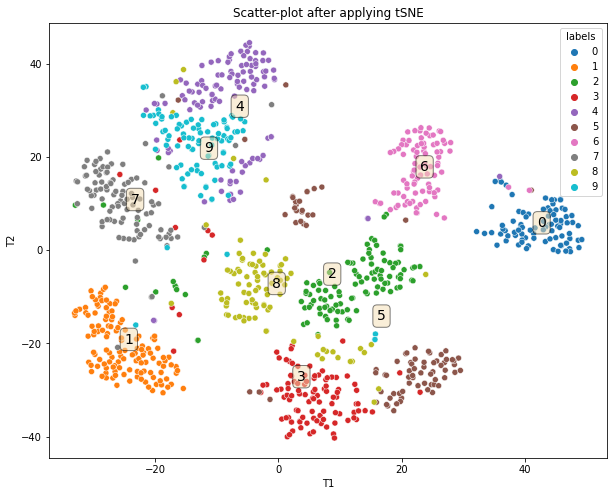

In [68]:
# tsne
plot_tsne(compute_tsne(df=layer2_data, labels=y_test[:1000])[1])
plt.show()

---
* PCA/tSNE on Layer 3:

In [69]:
# 3rd layer output

layer3_model = tf.keras.Model(inputs=model5.input,
                                       outputs=model5.get_layer('layer3').output)
layer3_data = layer3_model(x_test[:1000])
layer3_data.shape

TensorShape([1000, 1024])

Shape: (1000, 2)


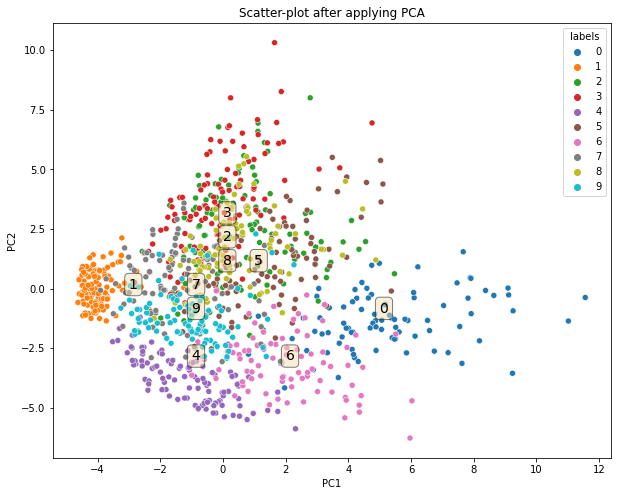

In [70]:
# pca
plot_pca(compute_pca(df=layer3_data, labels=y_test[:1000])[1])
plt.show()

Shape: (1000, 2)


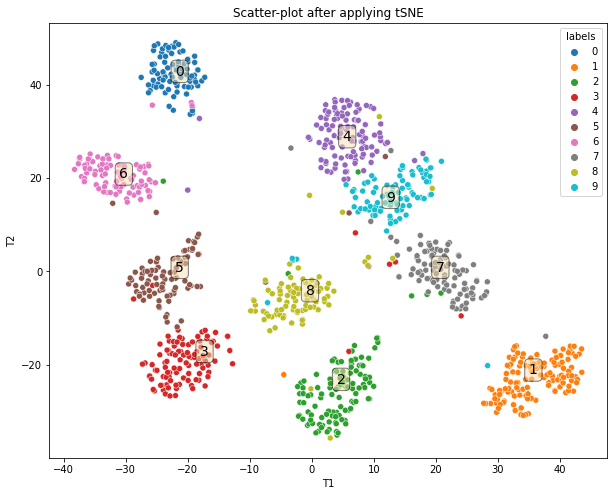

In [71]:
# tsne
plot_tsne(compute_tsne(df=layer3_data, labels=y_test[:1000])[1])
plt.show()

---
* PCA/tSNE on Layer 4:

In [72]:
# 4th layer output

layer4_model = tf.keras.Model(inputs=model5.input,
                                       outputs=model5.get_layer('layer4').output)
layer4_data = layer4_model(x_test[:1000])
layer4_data.shape

TensorShape([1000, 1024])

Shape: (1000, 2)


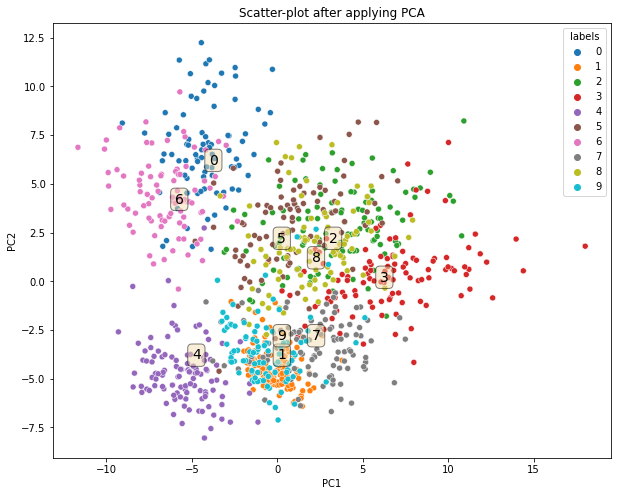

In [73]:
# pca
plot_pca(compute_pca(df=layer4_data, labels=y_test[:1000])[1])
plt.show()

Shape: (1000, 2)


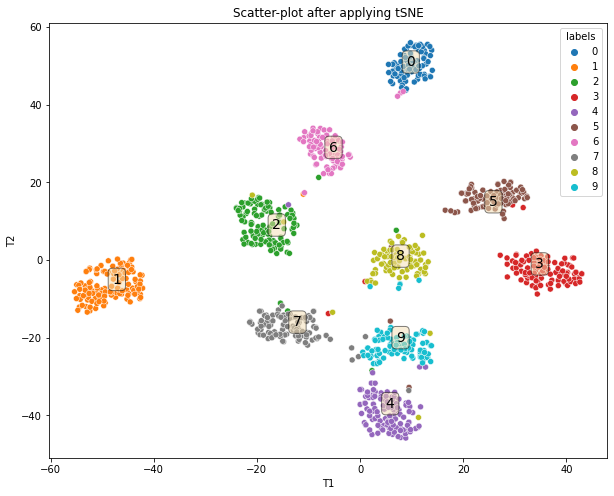

In [74]:
# tsne
plot_tsne(compute_tsne(df=layer4_data, labels=y_test[:1000])[1])
plt.show()

---

* PCA/tSNE on Layer 5:

In [84]:
# 5th layer output

layer5_model = tf.keras.Model(inputs=model5.input,
                                       outputs=model5.get_layer('layer5').output)
layer5_data = layer5_model(x_test[:1000])
layer5_data.shape

TensorShape([1000, 1024])

Shape: (1000, 2)


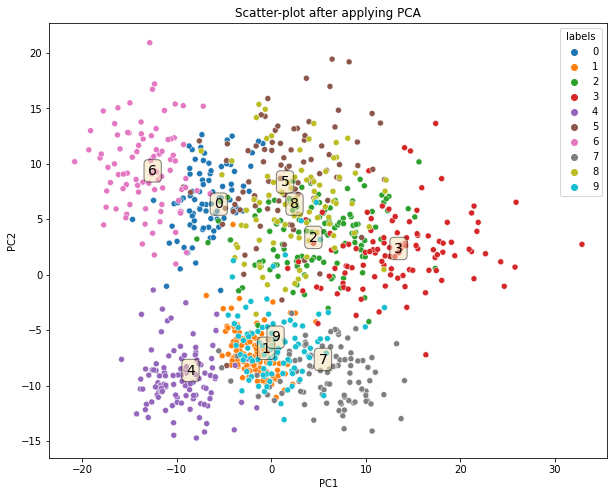

In [85]:
# pca
plot_pca(compute_pca(df=layer5_data, labels=y_test[:1000])[1])
plt.show()

Shape: (1000, 2)


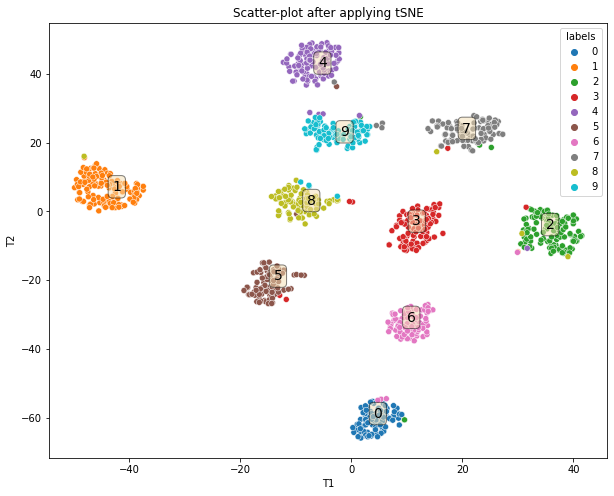

In [86]:
# tsne
plot_tsne(compute_tsne(df=layer5_data, labels=y_test[:1000])[1])
plt.show()

* PCA/tSNE on the softmax (last) layer

In [83]:
probas1000.shape

(1000, 10)

Shape: (1000, 2)


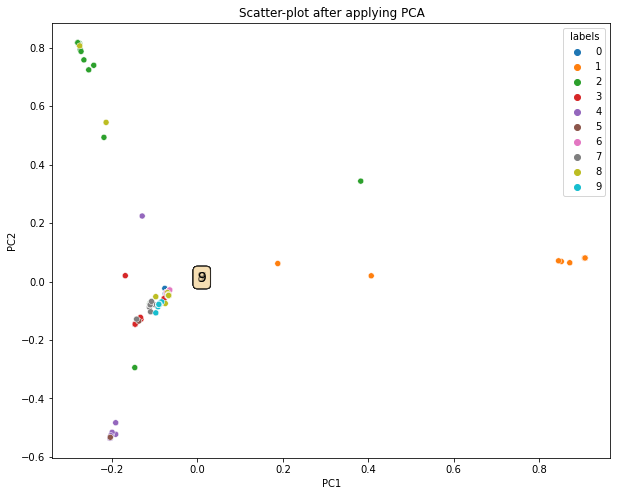

In [79]:
plot_pca(compute_pca(df=probas1000, labels=y_test[:1000])[1])
plt.show()

Shape: (1000, 2)


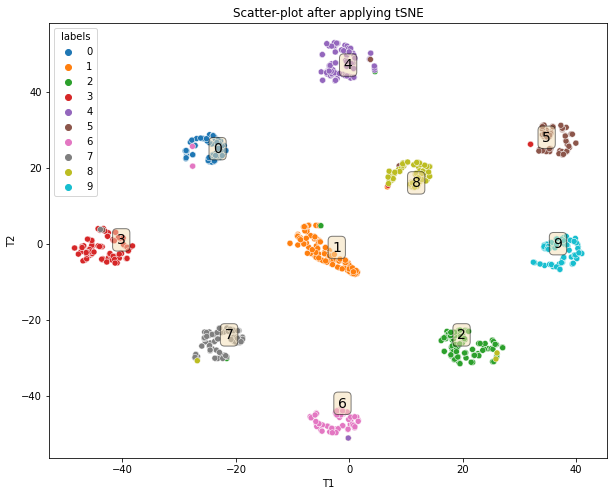

In [80]:
plot_tsne(compute_tsne(df=probas1000, labels=y_test[:1000])[1])
plt.show()

#### Observations:

* We can see the clusters forming clearly starting from the first hidden layer to the last layer with tSNE dimensionality reduction.
* The clustering in tSNE plots gets more and more precise as the no of layers increase. The last hidden layer and the softmax layer show the best clustering effect. 
* These clusters are more comprehensible as compared to the clusters formed by performing dimensionality reduction on the raw input data.
* As with PCA, there is little to no clustering effect. However, as we go futher down the layers, we can see that the similar data-points (similar digits) gather around their respective areas.
* The PCA plots converge clearer as we go down the layers but PCA is not performing as good as tSNE.
* We know that tSNE tries to capture clusters (nearest-neighbours) in the higher dimensions and then tries to preserve this information as much as possible in the lower dimensions.
* Thus when we see clear clusters forming in every layer for every digit, we can conclude that certain weights are activated in every layer when we input a character (digit) and then this information is being preserved by tSNE to form clusters for every digit.
* And as we go down the layers, the clustering improves; this means that the model is getting better at capturing features and this in tur helps with the overall classification challenge.
* This means each layer is capturing certain features and this is a better explaination to what is hapenning with respect to layers and their weights as compared to the earlier approach of randomly selecting dimensions and plotting the weights associated.


---